In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

## Выборка

In [2]:
df = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/data/main_data.csv')
X = df['nu']
Y = df['E']
int_rowX = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/data/interval.csv')
int_rowY = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/data/interval2.csv')
kor = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/data/kor.csv')

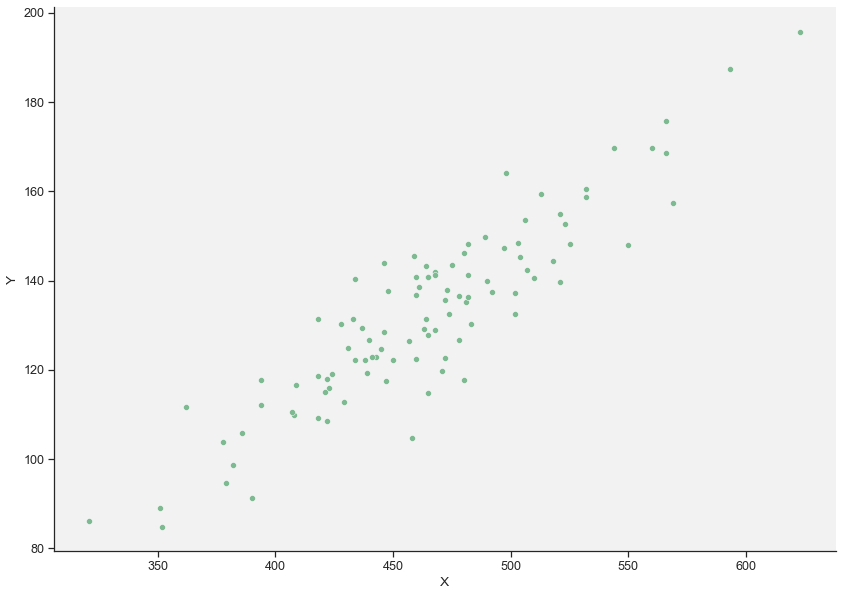

In [3]:
sns.set_theme(palette='crest', font_scale=1.15)
sns.set_style("ticks", {"axes.facecolor": ".95"})
ax = sns.relplot(data=df, x='nu', y='E', kind='scatter', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('X', 'Y')
plt.savefig('pics/1.png')

## Прямые регрессии

In [4]:
N = 100
xv, yv = 465.26, 132.09
sx, sy = 54.57, 19.97
r = 0.853

### Прямая x на y

In [5]:
regr_xy = lambda y: xv + r*(sx/sy)*(y-yv)

In [6]:
ost_var_xy = (sx**2)*(1-r**2)

### Прямая y на x

In [7]:
regr_yx = lambda x: yv + r*(sy/sx)*(x-xv)

In [8]:
ost_var_yx = (sy**2)*(1-r**2)

### График

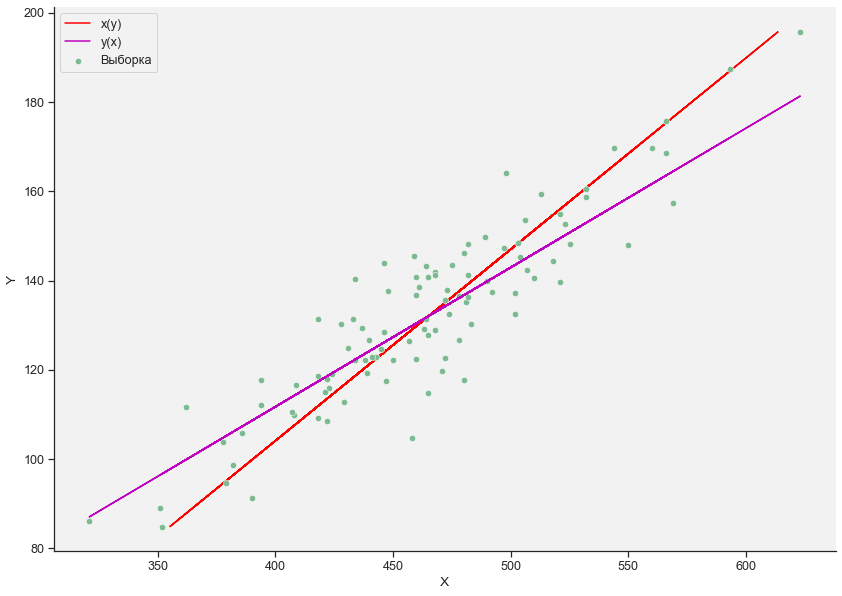

In [9]:
ax = sns.relplot(data=df, x='nu', y='E', kind='scatter', height=8.27, 
                 aspect=11.7/8.27, s=40, label='Выборка')
plt.plot(regr_xy(df['E']), df['E'], label='x(y)', zorder=0, c='r')
plt.plot(df['nu'], regr_yx(df['nu']), label='y(x)', zorder=1, c='m')
ax.set_axis_labels('X', 'Y')
plt.legend()
plt.savefig('pics/2.png')

In [10]:
ost_var_xy
ost_var_yx

811.1490457959002

108.6297759519

## Выборочное корреляционное отношение

### Таблица

In [11]:
kor.loc[1:7,'Xi'] = [np.sum(kor.iloc[i,1:8]) for i in range(1,8)]
kor.iloc[8,1:8] = [np.sum(kor.iloc[1:8,i]) for i in range(1,8)]
kor.iloc[8,8] = 100

#### Средний x для данного y (условный выборочный x)

In [12]:
kor.loc[1:7,'yX'] =[(np.dot(kor.iloc[0,1:8],kor.iloc[i,1:8])/kor.loc[i,'Xi']).round(2) for i in range(1,8)]

#### Средний y для данного x (условный выборочный y)

In [13]:
kor.iloc[9,1:8] =[(np.dot(kor.iloc[1:8,0],kor.iloc[1:8,i])/kor.iloc[8,i]).round(2) for i in range(1,8)]

#### Групповая выборочная дисперсия X

In [14]:
kor['D_grX'] = np.NaN
for i in range(1,8):
    x0_arg_kv = kor.iloc[0,1:8]**2
    dt = np.dot(x0_arg_kv,kor.iloc[i,1:8])/kor.loc[i,'Xi']
    dt -= kor.loc[i,'yX']**2
    kor.loc[i,'D_grX'] =(dt).round(2)

#### Групповая выборочная дисперсия Y

In [15]:
kor = kor.append(pd.Series(dtype='float64'), ignore_index=True)
for i in range(1,8):
    y0_arg_kv = kor.iloc[1:8,0]**2
    dt2 = np.dot(y0_arg_kv,kor.iloc[1:8,i])/kor.iloc[8,i]
    dt2 -= kor.iloc[9,i]**2
    kor.iloc[10,i] =(dt2).round(2)

In [16]:
kor

,yi,x1,x2,x3,x4,x5,x6,x7,Xi,yX,D_grX
0,NaN,343.0,387.00,431.00,475.00,519.00,563.00,604.0,NaN,NaN,NaN
1,92.9,3.0,3.00,0.00,0.00,0.00,0.00,0.0,6.0,365.00,484.00
2,108.9,1.0,5.00,6.00,2.00,0.00,0.00,0.0,14.0,415.29,1270.64
3,124.9,0.0,1.00,18.00,12.00,1.00,0.00,0.0,32.0,448.88,704.50
4,140.9,0.0,0.00,3.00,20.00,9.00,1.00,0.0,33.0,485.67,821.65
5,156.9,0.0,0.00,0.00,1.00,7.00,1.00,0.0,9.0,519.00,430.22
6,172.9,0.0,0.00,0.00,0.00,0.00,4.00,0.0,4.0,563.00,0.00
7,188.3,0.0,0.00,0.00,0.00,0.00,0.00,2.0,2.0,604.00,0.00
8,NaN,4.0,9.00,27.00,35.00,17.00,6.00,2.0,100.0,NaN,NaN
9,NaN,96.9,105.34,123.12,134.04,146.55,164.90,188.3,NaN,NaN,NaN


### Дисперсии X к Y

#### Внутригрупповая дисперсия X к Y

In [17]:
D_vngr_xy = np.dot(kor.loc[1:7,'Xi'],kor.loc[1:7,'D_grX'])/kor.iloc[8,8]
D_vngr_xy.round(4)

742.2339

#### Межгрупповая дисперсия X к Y

In [18]:
kv_mezh_xy = (kor.loc[1:7,'yX']-xv)**2
D_mezh_xy = np.dot(kor.loc[1:7,'Xi'],kv_mezh_xy)/kor.iloc[8,8]
D_mezh_xy.round(4)

2203.048

#### Общая дисперсия X к Y

In [19]:
D_obsh_xy = D_vngr_xy + D_mezh_xy
D_obsh_xy.round(4)

2945.2819

#### Выборочное корреляционное отношение X к Y

In [20]:
eta_xy = np.sqrt(D_mezh_xy/D_obsh_xy)
eta_xy.round(4)
r

0.8649

0.853

### Дисперсии Y к X

#### Внутригрупповая дисперсия Y к X

In [21]:
D_vngr_yx = np.dot(kor.iloc[8,1:8],kor.iloc[10,1:8])/kor.iloc[8,8]
D_vngr_yx

94.8854

#### Межгрупповая дисперсия Y к X

In [22]:
kv_mezh_yx = (kor.iloc[9,1:8]-yv)**2
D_mezh_yx = np.dot(kor.iloc[8,1:8],kv_mezh_yx)/kor.iloc[8,8]
D_mezh_yx.round(4)

300.316

#### Общая дисперсия Y к X

In [23]:
D_obsh_yx = D_vngr_yx + D_mezh_yx
D_obsh_yx.round(4)

395.2014

#### Выборочное корреляционное отношение Y к X

In [24]:
eta_yx = np.sqrt(D_mezh_yx/D_obsh_yx)
eta_yx.round(4)
r

0.8717

0.853

## Корреляционные кривые

In [25]:
kor

,yi,x1,x2,x3,x4,x5,x6,x7,Xi,yX,D_grX
0,NaN,343.0,387.00,431.00,475.00,519.00,563.00,604.0,NaN,NaN,NaN
1,92.9,3.0,3.00,0.00,0.00,0.00,0.00,0.0,6.0,365.00,484.00
2,108.9,1.0,5.00,6.00,2.00,0.00,0.00,0.0,14.0,415.29,1270.64
3,124.9,0.0,1.00,18.00,12.00,1.00,0.00,0.0,32.0,448.88,704.50
4,140.9,0.0,0.00,3.00,20.00,9.00,1.00,0.0,33.0,485.67,821.65
5,156.9,0.0,0.00,0.00,1.00,7.00,1.00,0.0,9.0,519.00,430.22
6,172.9,0.0,0.00,0.00,0.00,0.00,4.00,0.0,4.0,563.00,0.00
7,188.3,0.0,0.00,0.00,0.00,0.00,0.00,2.0,2.0,604.00,0.00
8,NaN,4.0,9.00,27.00,35.00,17.00,6.00,2.0,100.0,NaN,NaN
9,NaN,96.9,105.34,123.12,134.04,146.55,164.90,188.3,NaN,NaN,NaN


### Параболическая регерессия Y на X

In [26]:
df_prbl_x = pd.DataFrame({'x': kor.iloc[0,1:8], 'n': kor.iloc[8,1:8], 'y': kor.iloc[9,1:8]})

In [27]:
for i in range(1,5):
    df_prbl_x[f'nx{i}'] = df_prbl_x['n']*(df_prbl_x['x']**i)
df_prbl_x['ny'] = df_prbl_x['n']*df_prbl_x['y']
df_prbl_x['nyx1'] = df_prbl_x['nx1']*df_prbl_x['y']
df_prbl_x['nyx2'] = df_prbl_x['nx2']*df_prbl_x['y']

df_prbl_xf = df_prbl_x.append(df_prbl_x.sum(), ignore_index=True)
df_prbl_xf.iloc[-1,[0,2]] = 0
df_prbl_xf.to_csv('data/parabolxy.csv', index=False)
df_prbl_xf

,x,n,y,nx1,nx2,nx3,nx4,ny,nyx1,nyx2
0,343.0,4.0,96.90,1372.0,470596.0,1.614144e+08,5.536515e+10,387.60,132946.80,4.560075e+07
1,387.0,9.0,105.34,3483.0,1347921.0,5.216454e+08,2.018768e+11,948.06,366899.22,1.419900e+08
2,431.0,27.0,123.12,11637.0,5015547.0,2.161701e+09,9.316930e+11,3324.24,1432747.44,6.175141e+08
3,475.0,35.0,134.04,16625.0,7896875.0,3.751016e+09,1.781732e+12,4691.40,2228415.00,1.058497e+09
4,519.0,17.0,146.55,8823.0,4579137.0,2.376572e+09,1.233441e+12,2491.35,1293010.65,6.710725e+08
5,563.0,6.0,164.90,3378.0,1901814.0,1.070721e+09,6.028161e+11,989.40,557032.20,3.136091e+08
6,604.0,2.0,188.30,1208.0,729632.0,4.406977e+08,2.661814e+11,376.60,227466.40,1.373897e+08
7,0.0,100.0,0.00,46526.0,21941522.0,1.048377e+10,5.073106e+12,13208.65,6238517.71,2.985673e+09


In [28]:
M1 = np.array([[df_prbl_xf.loc[7,'nx4'],df_prbl_xf.loc[7,'nx3'],df_prbl_xf.loc[7,'nx2']],
               [df_prbl_xf.loc[7,'nx3'],df_prbl_xf.loc[7,'nx2'],df_prbl_xf.loc[7,'nx1']],
               [df_prbl_xf.loc[7,'nx2'],df_prbl_xf.loc[7,'nx1'],df_prbl_xf.loc[7,'n']]])
v1 = np.array([df_prbl_xf.loc[7,'nyx2'],df_prbl_xf.loc[7,'nyx1'],df_prbl_xf.loc[7,'ny']])
a, b, c = np.linalg.solve(M1, v1)
parab_regr = lambda x: a*x*x+b*x+c
a.round(4), b.round(4), c.round(4)

(0.0003, 0.0021, 57.4223)

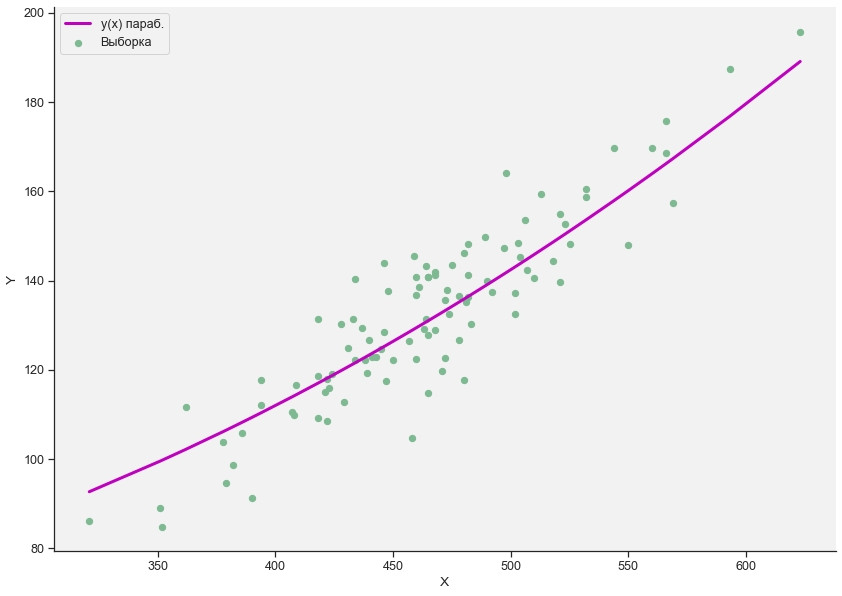

In [29]:
ax = sns.relplot(data=df, x='nu', y=parab_regr(df['nu']), kind='line', linewidth=3,
                 height=8.27, aspect=11.7/8.27, label='y(x) параб.', color='m')
plt.scatter(df['nu'], df['E'], s=40, label='Выборка')
ax.set_axis_labels('X', 'Y')
plt.legend()
plt.savefig('pics/3.png')

### Логарифмическая регерессия Y на X

In [76]:
df_step_x = pd.DataFrame({'x': kor.iloc[0,1:8], 'n': kor.iloc[8,1:8], 'y': kor.iloc[9,1:8]})
df_step_x

,x,n,y
x1,343.0,4.0,96.90
x2,387.0,9.0,105.34
x3,431.0,27.0,123.12
x4,475.0,35.0,134.04
x5,519.0,17.0,146.55
x6,563.0,6.0,164.90
x7,604.0,2.0,188.30


In [80]:
df_step_x['ln(x)'] = np.log(df_step_x['x'])
df_step_x['ln2(x)'] = (np.log(df_step_x['x']))**2
df_step_x['ln(x)y'] = df_step_x['ln(x)']*df_step_x['y']

df_step_xf = df_step_x.append(df_step_x.sum(), ignore_index=True)
df_step_xf.iloc[-1,[0]] = np.NaN
df_step_xf.round(3).to_csv('data/logxy.csv', index=False)
df_step_xf

,x,n,y,ln(x),ln2(x),ln(x)y
0,343.0,4.0,96.90,5.837730,34.079097,565.676080
1,387.0,9.0,105.34,5.958425,35.502825,627.660457
2,431.0,27.0,123.12,6.066108,36.797667,746.859228
3,475.0,35.0,134.04,6.163315,37.986449,826.130716
4,519.0,17.0,146.55,6.251904,39.086302,916.216514
5,563.0,6.0,164.90,6.333280,40.110431,1044.357811
6,604.0,2.0,188.30,6.403574,41.005763,1205.793021
7,NaN,100.0,959.15,43.014336,264.568534,5932.693828


In [78]:
b2 = ((df_step_xf.loc[7,'n']*df_step_xf.loc[7,'ln(x)y'])-(df_step_xf.loc[7,'y']*df_step_xf.loc[7,'ln(x)']))/(((df_step_xf.loc[7,'n']*df_step_xf.loc[7,'ln2(x)'])-(df_step_xf.loc[7,'ln(x)'])**2))
a2 = (df_step_xf.loc[7,'y']-(df_step_xf.loc[7,'ln(x)']*b2))/df_step_xf.loc[7,'n']
a2.round(4), b2.round(4)
log_regr = lambda x: a2+b2*np.log(x)

(-0.0581, 22.4335)

Text(0.5, 0, 'radius')

Text(0, 0.5, 'perimeter')

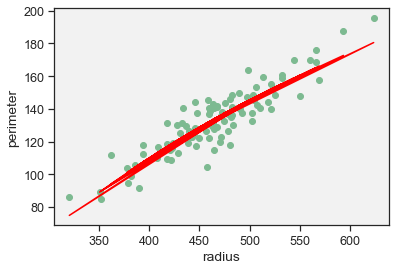

(-845.1518434968043, 159.40172772715542)

In [82]:
X_new_ln = np.hstack((np.ones((N,1)),np.expand_dims(np.log(X),1)))
beta_curr_hat = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_new_ln.T,X_new_ln)),X_new_ln.T),Y)
plt.scatter(X,Y)
plt.xlabel("radius")
plt.ylabel("perimeter")
plt.plot(X,beta_curr_hat[0] + np.log(X) * beta_curr_hat[1],"-r")
plt.show()
a2 = beta_curr_hat[0]
b2 = beta_curr_hat[1]
log_regr = lambda x: a2+b2*np.log(x)
a2, b2

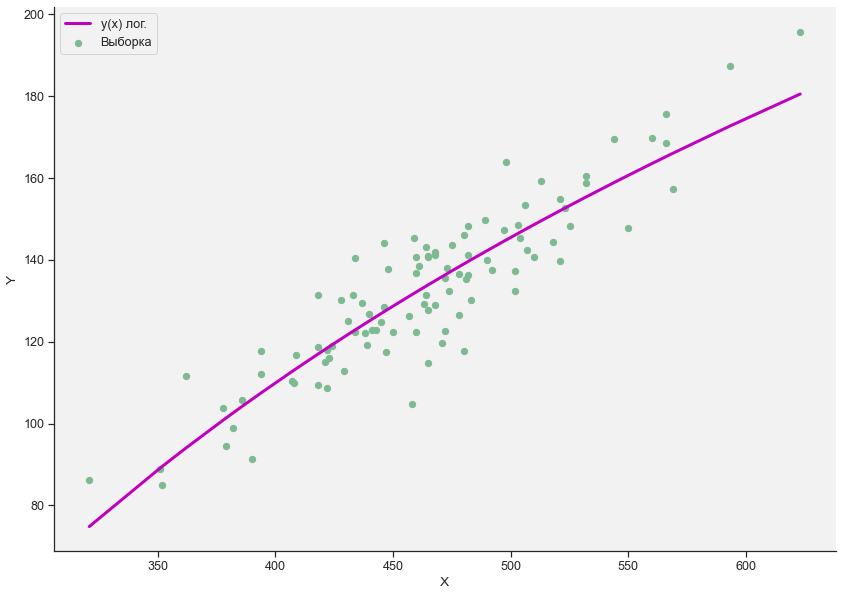

In [83]:
ax = sns.relplot(data=df, x='nu', y=log_regr(df['nu']), kind='line', linewidth=3,
                 height=8.27, aspect=11.7/8.27, label='y(x) лог.', color='m')
plt.scatter(df['nu'], df['E'], s=40, label='Выборка')
ax.set_axis_labels('X', 'Y')
plt.legend()
plt.savefig('pics/4.png')

In [70]:
dfst = df.copy()
dfst['1'] = parab_regr(dfst['nu'])
dfst['2'] = log_regr(dfst['nu'])
dfstm = dfst.melt(id_vars='nu', value_vars=['1','2'])

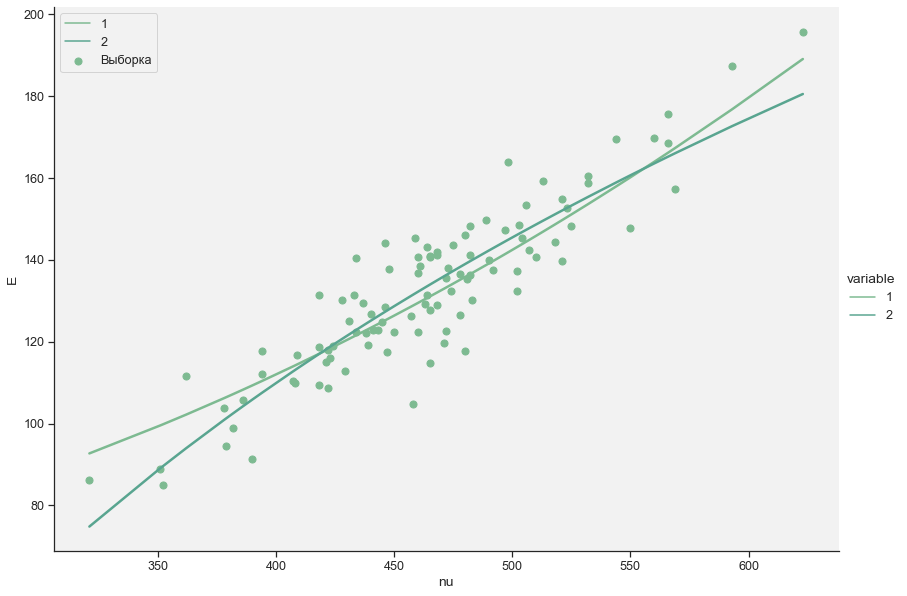

In [71]:
ax = sns.relplot(data=dfstm, x='nu', y='value', hue='variable', kind='line', linewidth=2.5,
                 height=8.27, aspect=11.7/8.27)
plt.scatter(df['nu'], df['E'], s=50, label='Выборка')
ax.set_axis_labels('nu', 'E')
plt.legend()